In [1]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.FashionMNIST(root='../PYTORCH_NOTEBOOKS/Data', train=True, download = True, transform = transform)
test_data = datasets.FashionMNIST(root='../PYTORCH_NOTEBOOKS/Data', train=False, download = True, transform = transform)

In [5]:
class_names = ['T-shirt','Trouser','Sweater','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

In [6]:
train_loader = DataLoader(train_data, batch_size = 10, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 10, shuffle=False)

In [7]:
for images,labels in train_loader:
    break

In [8]:
images.shape

torch.Size([10, 1, 28, 28])

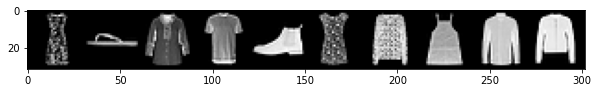

In [9]:
im = make_grid(images,nrow=10)
plt.figure(figsize=(10,6))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

label: [6 1 3 4 3 2 7 5 3 6]
class: Shirt Trouser Dress Coat Dress Sweater Sneaker Sandal Dress Shirt


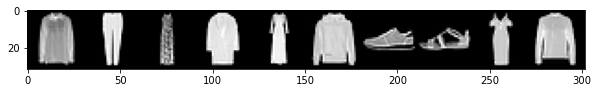

In [10]:
for images,labels in train_loader:
    break
    
print('label:', labels.numpy())
print('class:', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow = 10)

plt.figure(figsize=(10,6))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [11]:
conv = nn.Conv2d(1,1,5,1)
for x,labels in train_loader:
    print('original_size:', x.shape)
    break
x = conv(x)
print('Down_size:', x.shape)

original_size: torch.Size([10, 1, 28, 28])
Down_size: torch.Size([10, 1, 24, 24])


In [12]:
x = F.max_pool2d(x,2,2)
x.shape

torch.Size([10, 1, 12, 12])

In [13]:
class ShoppingModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(5*5*16,100)
        self.fc2 = nn.Linear(100,10)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,5*5*16)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return F.log_softmax(x,dim=1)

In [14]:
torch.manual_seed(101)
model = ShoppingModel()

In [15]:
model

ShoppingModel(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [16]:
for param in model.parameters():
    print(param.numel())

54
6
864
16
40000
100
1000
10


In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [18]:
epochs = 3
losses = []
for i in range(epochs):
    for X_train,y_train in train_loader:
        
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        losses.append(loss)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"epochs: {i}  loss: {loss.item()}")

epochs: 0  loss: 0.4585093855857849
epochs: 1  loss: 0.31393226981163025
epochs: 2  loss: 0.18213650584220886


In [19]:
model.eval()

with torch.no_grad():
    for X_test,y_test in test_loader:
        
        y_val = model(X_test)
        loss = criterion(y_val,y_test)

In [20]:
print("loss:", loss)

loss: tensor(0.0228)


## Prediction from the model

In [25]:
model.eval()
x = 2000
with torch.no_grad():
    new_pred = model(test_data[x][0].view(1,1,28,28)).argmax()
    
print('predicted value:', new_pred.item())
print('class: ', class_names[new_pred])

predicted value: 8
class:  Bag


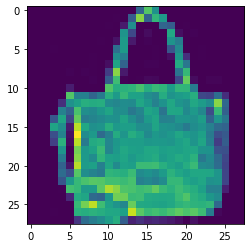

In [26]:
plt.imshow(test_data[x][0].reshape((28,28)))